# **Descriptive and Geospatial Analytics on the Stipend Dataset**

This document is a continuation to the exploratory data analysis on the stipend dataset, here we aim to draw out insights and create supplementary datastes to answer our objective questions and aid in creating an interactive dashboard of the findings as well as a prediction model

**Disclaimer:** The metrics and analytics presented in this report are derived from a pre-sourced dataset obtained from Kaggle and are part of an independent analytics project. The creator of this report does not claim any responsibility for the accuracy, completeness, or real-life applicability of the findings. The information provided is based on the dataset available and may not reflect current or real-world conditions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/stipend data cleaned.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6452 entries, 0 to 6451
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Role                     6452 non-null   object 
 1   Organization             6452 non-null   object 
 2   Location                 6452 non-null   object 
 3   Start Date               6452 non-null   object 
 4   Duration in Months       6452 non-null   float64
 5   Average Monthly Stipend  6452 non-null   float64
 6   Added Incentives         6452 non-null   object 
 7   Currency                 6452 non-null   object 
dtypes: float64(2), object(6)
memory usage: 403.4+ KB


,Role,Organization,Location,Start Date,Duration in Months,Average Monthly Stipend,Added Incentives,Currency
0,Talent Acquisition,Marpu Foundation,Remote,Immediately,0.25,0.0,No,INR
1,Social Work,Marpu Foundation,Remote,Immediately,0.25,0.0,No,INR
2,Event Coordination,Aam Aadmi Party,Delhi,Immediately,0.25,0.0,No,INR
3,Human Resources (HR),Subhansh Sewa Trust,Remote,Immediately,0.25,0.0,No,INR
4,Induction Representation,Subhansh Sewa Trust,Remote,Immediately,0.25,0.0,No,INR


## **Objective Quetions**

1. How many companies are offering internships?

2. How many locations across India have internship openings?

3. What is the ratio of remote to inperson internships?

4. Which locations host the highest number of internships and which location offers the highest stipends on average?

5. Which companies have the highest number of openings and which comapnies offer the highest stipends?

6. Which roles pay the most on average?



##First Let us observe preliminary details in the dataset

In [ ]:
# Initial Observations
total_companies= df["Organization"].unique().size
total_roles=df['Role'].size
no_of_locs=df[df['Location']!='Remote']['Location'].unique().size
no_of_remote_roles=df[df['Location']=='Remote']['Role'].size
no_of_inperson_roles= total_roles-no_of_remote_roles
print("Total number of offering Companies: ",total_companies)
print("Total Number of open positions: ",total_roles)
print("Total number of Locations across India: ",no_of_locs)
print("Total number of Remote Roles: ",no_of_remote_roles)
print("Total number of In-Person Roles: ",no_of_inperson_roles)

Total number of offering Companies:  4656
Total Number of open positions:  6452
Total number of Locations across India:  172
Total number of Remote Roles:  2843
Total number of In-Person Roles:  3609


From the initial observations we see that


1.   There are 6452 internship openings
2.   There are 4656 companies offering internhips
3.   The internships are spread across 172 locations in India
4.   There are 2843 remote internships and 3609 in-person internships





Next we head into analyzing the data to draw out inshights

##**1. Descriptive Analytics**

 **1 A. Location Analysis**
The next cells contain the Detailed Analysis of each loaction where internships are open

In [ ]:

#1. by mean and median stipends

locations_offering_highest_meanpay= df.groupby('Location')['Average Monthly Stipend'].mean().sort_values(ascending=False)
print("Locations offering Highest Mean Stipend: \n", locations_offering_highest_meanpay)

locations_offering_highest_medianpay= df.groupby('Location')['Average Monthly Stipend'].median().sort_values(ascending=False)
print("\n \n Locations offering Highest Median Stipend: \n", locations_offering_highest_medianpay)

df_mean = pd.DataFrame({'Location':locations_offering_highest_meanpay.index, 'Mean Stipend':locations_offering_highest_meanpay.values})
df_median = pd.DataFrame({'Location':locations_offering_highest_medianpay.index, 'Median Stipend':locations_offering_highest_medianpay.values})
df_mean.to_csv('locations_meanstipend.csv')
df_median.to_csv('locations_medianstipend.csv')


Locations offering Highest Mean Stipend: 
 Location
Warangal        30000.00
Indiranagara    30000.00
Jodhpur         29000.00
North Goa       25000.00
Tamil Nadu      20000.00
                  ...   
Karur            2000.00
Villupuram       2000.00
Pudukkottai      2000.00
Kanchipuram      2000.00
Haryana          1666.67
Name: Average Monthly Stipend, Length: 173, dtype: float64

 
 Locations offering Highest Median Stipend: 
 Location
Indiranagara    30000.00
Warangal        30000.00
North Goa       25000.00
Tamil Nadu      20000.00
Varanasi        18500.00
                  ...   
Bhavnagar        2000.00
Agartala         2000.00
Pudukkottai      2000.00
Kanchipuram      2000.00
Haryana          1666.67
Name: Average Monthly Stipend, Length: 173, dtype: float64


As we can see Warangal offers the highest average stipend

Now we see the pay disparity between remote and in-person internships

In [ ]:
#2. in person or remote internships which pays more on average?

mean_remote_stipend=df[df['Location']=='Remote']['Average Monthly Stipend'].mean()

mean_inperson_stipend=df[df['Location']!='Remote']['Average Monthly Stipend'].mean()

print("Mean Remote Stipend: ",mean_remote_stipend)
print("Mean In-Person Stipend: ",mean_inperson_stipend)







Mean Remote Stipend:  6000.390608512135
Mean In-Person Stipend:  9237.665929620394


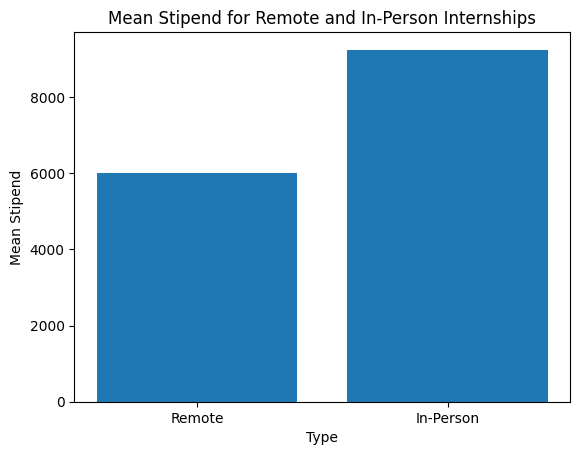

In [ ]:
df_mean_stipend = pd.DataFrame({'Type': ['Remote', 'In-Person'], 'Mean Stipend': [mean_remote_stipend, mean_inperson_stipend]})
plt.bar(df_mean_stipend['Type'], df_mean_stipend['Mean Stipend'])
plt.xlabel("Type")
plt.ylabel("Mean Stipend")
plt.title("Mean Stipend for Remote and In-Person Internships")
plt.show()

Thus we see that the average stipend for onsite internships is more when compared to that of remote internships

Let us find the top 10 Locations and their median pay across India for in-person internships

In [ ]:
top_10_locations=df.groupby('Location')['Role'].count().sort_values(ascending=False).head(10)
print(top_10_locations)

print("\n\nStipends in the top 10 locations: \n")
stipends_in_the_top_10_locations=df[df['Location'].isin(top_10_locations.index)].groupby('Location')['Average Monthly Stipend'].median()
print(stipends_in_the_top_10_locations)

Location
Remote       2843
Mumbai        613
Delhi         556
Bangalore     493
Gurgaon       269
Noida         221
Pune          213
Hyderabad     162
Chennai       121
Jaipur        104
Name: Role, dtype: int64


Stipends in the top 10 locations: 

Location
Bangalore    10000.0
Chennai      10000.0
Delhi         8500.0
Gurgaon      10000.0
Hyderabad    10000.0
Jaipur        8000.0
Mumbai        9000.0
Noida         9000.0
Pune          8000.0
Remote        5000.0
Name: Average Monthly Stipend, dtype: float64


**1 B. Sector Analytics**

Now we analyze and find 20 companies with the highest number of openings

In [ ]:
top_20_companies_with_most_vacancies= df.groupby('Organization')['Role'].count().sort_values(ascending=False).head(20)
print(top_20_companies_with_most_vacancies)




Organization
Top Talent Bridge                                 49
Stirring Minds                                    31
HappiMynd                                         30
Pawzz                                             26
Narigiri's Connect To Universe Private Limited    26
Pereyan LLP                                       22
Blackcoffer                                       22
Avaari                                            19
Across The Globe (ATG)                            19
Buddha Education Association Incorporation        18
QA Solvers                                        18
Eduminatti                                        18
Shubh International                               17
Qriocity Ventures Private Limited                 17
HaZZten                                           17
Energy Alternatives India                         16
Lawtech                                           15
Trading Shalaa                                    15
Nettv4u                          

Next we see the comapnies which offer the 20 highest median stipends across india

In [ ]:
top20_median_stipends=df.groupby('Organization')['Average Monthly Stipend'].median().sort_values(ascending=False).head(20)
print(top20_median_stipends)


Organization
Desigo Milk                                     80000.0
Saathi Eco Innovations India Private Limited    60000.0
The Concept Co.                                 50000.0
Ekostay LLP                                     50000.0
GoComet                                         45000.0
Digit88                                         40000.0
NOIR & BLANCO                                   35000.0
WiJungle - by HttpCart                          32500.0
Nerdy Academy                                   32500.0
AltaSierra                                      31500.0
Runpluson Private Limited                       30500.0
Health Hub India                                30000.0
Bodii                                           30000.0
DigiKind Co. (DKC)                              30000.0
Salesken                                        30000.0
Failure Before Success                          30000.0
PickYourTrail                                   30000.0
Technest Learning                  

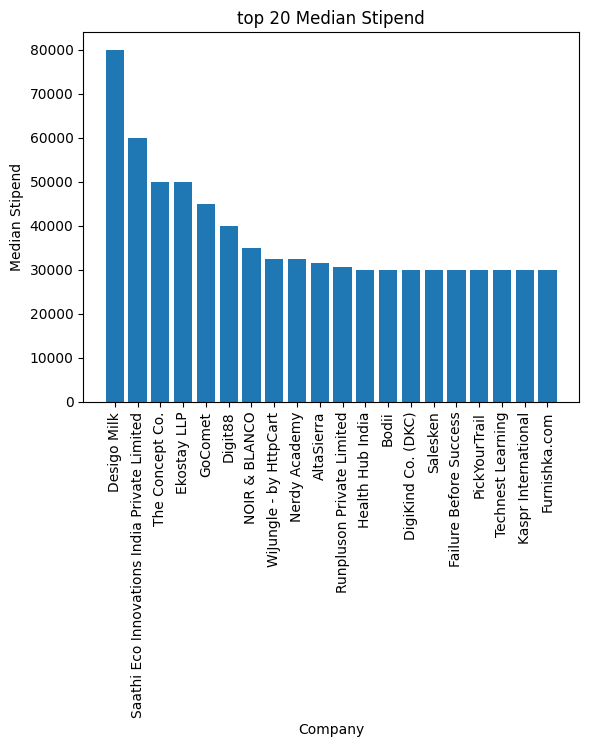

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.bar(top20_median_stipends.index,top20_median_stipends.values)
plt.xlabel("Company")
plt.ylabel("Median Stipend")
plt.title("top 20 Median Stipend")
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
# extracting a csv file of companies sortd in the descending order of their median stipends
companies_sorted_by_medianpay= df.groupby('Organization')['Average Monthly Stipend'].median().sort_values(ascending=False)
companies_sorted_by_medianpay=pd.DataFrame({'Companies':companies_sorted_by_medianpay.index,'Median Stipend':companies_sorted_by_medianpay.values})
companies_sorted_by_medianpay.to_csv('companies_sorted_by_medianpay.csv')

Now we Analyze various industries and internship positions in order to find which pay the post

In [ ]:
# Industry wise analysis

roles_by_pay=df.groupby('Role')['Average Monthly Stipend'].median().sort_values(ascending=False)
print(roles_by_pay)

roles_by_pay=pd.DataFrame({'Roles':roles_by_pay.index,'Median Stipend':roles_by_pay.values})
roles_by_pay.to_csv('roles_by_pay.csv')



Role
C++ Development                                                     32500.0
Golang Development                                                  32500.0
Clothing Design For Christian Charity Clothing Brand                31500.0
Teaching (Python/Java/C++/Kotlin/Go/Javascript/Swift/Scala/Ruby)    30000.0
Product Support Engineering                                         30000.0
                                                                     ...   
Human Resources (teams)                                                 0.0
Convolution Neural Network                                              0.0
Social Work                                                             0.0
Archaeology Event Management                                            0.0
Business Analyst (Marketing)                                            0.0
Name: Average Monthly Stipend, Length: 2162, dtype: float64


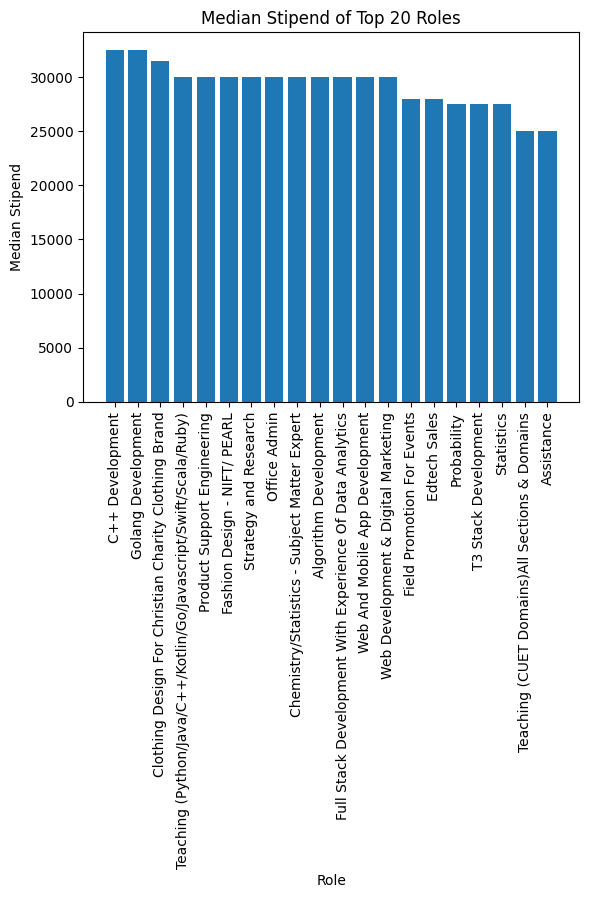

In [ ]:
top20_roles= roles_by_pay.head(20)

plt.bar(top20_roles['Roles'],top20_roles['Median Stipend'])
plt.xlabel("Role")
plt.ylabel("Median Stipend")
plt.title("Median Stipend of Top 20 Roles")
plt.xticks(rotation=90)
plt.show()

As clearly shown from the graph and table above internships in fields such as C++ and Golang development pay more than most other fields, followed by positions such as product support engineering and fashion designing

**1 C. Incentive and Duration Analysis**

Now we will analyze the dataset by duration of internships and added incentives

In [ ]:
Num_internships_withincentives= df[df['Added Incentives']=='Yes']['Added Incentives'].count()
print("Number of internships which offer additional incentives: ",Num_internships_withincentives)

Num_companies_giving_incentives= df[df['Added Incentives']=='Yes']['Organization'].unique().size
print("Number of companies offering incentives: ",Num_companies_giving_incentives)

companies_with_incentives= df[df['Added Incentives']=='Yes']['Organization'].unique()
companies_with_incentives=pd.DataFrame({'Companies':companies_with_incentives})
companies_with_incentives.to_csv('companies_with_incentives.csv')

mean_stipend_with_incentives= df[df['Added Incentives']=="Yes"]["Average Monthly Stipend"].mean()
mean_stipend_without_incentives= df[df['Added Incentives']=="No"]["Average Monthly Stipend"].mean()

print("Mean Stipend with incentives:",mean_stipend_with_incentives.round(3))
print("Mean Stipend without incentives:",mean_stipend_without_incentives.round(3))

Number of internships which offer additional incentives:  171
Number of companies offering incentives:  135
Mean Stipend with incentives: 2073.099
Mean Stipend without incentives: 8201.436


It is seen the median stipend is much higher in cases where there are no added incentives offered

In [ ]:
# How does duration come into play when incentives are offerd?

mean_duration_with_incentives= df[df['Added Incentives']=='Yes']['Duration in Months'].mean()
mean_duration_without_incentives= df[df['Added Incentives']=='No']['Duration in Months'].mean()

print(f"Mean Duration with incentives: {mean_duration_with_incentives:.2f} months")
print(f"Mean Duration without incentives: {mean_duration_without_incentives:.2f} months")




Mean Duration with incentives: 3.89 months
Mean Duration without incentives: 3.83 months


## **2. GeoSpatial Analytics**

Now we go into the Geospatial analysis of the dataset, we shall focus on identifying and visualizing locations of the in-person internships on a political map,to get an idea of how these openings are spread across the country.

To plot the map  we first have to obtain the lattitudes and longitude of each location, this is achieved by using geopy.encoders and the map is plotted using plotly express

In [ ]:
from geopy.geocoders import Photon
geolocator = Photon(user_agent="geoapiExercises")
locs= df[df['Location']!='Remote']
locs=locs.groupby('Location')['Role'].count().sort_values(ascending=False)
locs=pd.DataFrame({'Location':locs.index,'Count':locs.values})

def lat_lon(city):
  location = geolocator.geocode(city,timeout=12)
  if location:
        return location.latitude, location.longitude
  else:
        return None, None

locs['Latitude'], locs['Longitude'] = zip(*locs['Location'].apply(lat_lon))

locs.head()
locs.to_csv('locations.csv')


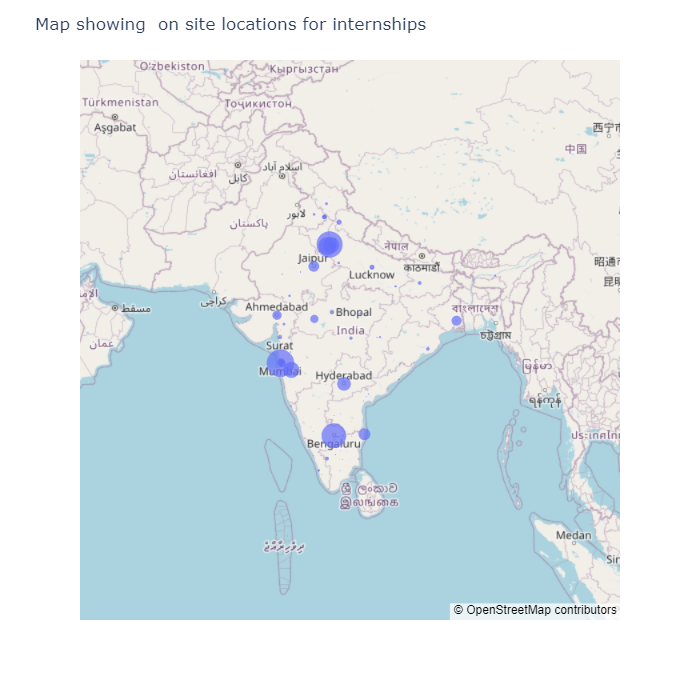

In [ ]:

import plotly.express as plx
from IPython.display import Image
locs=pd.read_csv('/content/locations.csv')
fig=plx.scatter_mapbox(
    locs,
    lat= locs['Latitude'],
    lon= locs['Longitude'],
    hover_name= 'Location',
    hover_data= ['Count'],
    center= {'lat':21,'lon':79},
    zoom=3,
    height=700,
    width=700,
    size="Count",
    )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title_text="Map showing  on site locations for internships")
# this is an interactive map
fig.show()

# this line is to generate a static map for the html document
Image(filename='/content/newplot.png')

The above map shows the spread of internships across India and the size of the bubbles is determined by the number of openings

# **Conclusions drawn from analysis**

1. How many companies are offering internships?
A. There are 4656 companies offering internhips

2. How many locations across India have internship openings?
The internships are spread across 172 locations in India.

3. What is the ratio of remote to inperson internships?
There are 2843 remote internships and 3609 in-person internships, which is ratio of approximately 1.26:1

4. Which locations host the highest number of internships and which location offers the highest stipends on average?
We see that Delhi,Mumbai and Bangalore are the 3 most poular cities in India for internships and Warangal is seen to have the highest average stipend compared to other locations.

5. Which companies have the highest number of openings and which comapnies offer the highest stipends?
To answer this question we have obtained a list of 20 companies showing which ones have the most number of vacanies and which offer the highest median stipend.

6. Which roles pay the most on average?
It is seen that C++ and golang development development pay the highest stipends on average, followed by fields such as product engineering and fashion design, we have drawn out graphs and lists to support the findings.

These are 6 major findings from the exploratory data analysis and the Descriptive,Sector and Geospatial Analysis if the dataset. We shall use all the information drawn out from these two notebooks to build an interactive dashboard to visualize our analysis.

